## **Implementación computacional de los propagadores de Fesnel y Fraunhofer**

### **Referencias Bibliograficas:** Voelz, D. G. (2011). Computational Fourier Optics: a MATLAB tutorial. Bellingham: Spie Press.

In [ ]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt


%matplotlib inline 
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

Se simula la propagación de la luz desde el plano Fuente hasta el plano de observación

In [ ]:
def rect2D(x): # FUNCION RECTANGULO EN 2D
  out = np.zeros((len(x),len(x)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(x)):
      out[cont,cont2]=int(np.abs(x[cont,cont2])<=1/2)
  return out

def circ(x,y,d): # FUNCION CÍRCULO
  out = np.zeros((len(x),len(y)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(y)):
      out[cont,cont2]=int(np.abs(np.sqrt(x[cont,cont2]**2+y[cont,cont2]**2)/d)<=1)
  return out

def propTF(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  # propagation - transfer function approach
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  fx=np.arange(-1/(dx*2),1/(dx*2),1/L)  
  FX, FY = np.meshgrid(fx, fx);
  H=np.exp(-1j*np.pi*lam*z*(FX**2+FY**2))
  H= np.fft.fftshift(H)
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

def propIR(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - IMPULSE RESPONSE APPROACH
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  
  X, Y = np.meshgrid(x, x);
  h=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X**2+Y**2))
  H= np.fft.fft2(np.fft.fftshift(h))*dx**2
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

###***Ejemplo: pupila cuadrada*** 

El número de Fresnel es  : 2.601 m
El muestreo usado es  : 0.00200 m
El crítico es  : 0.00200 m


<Figure size 1296x720 with 0 Axes>

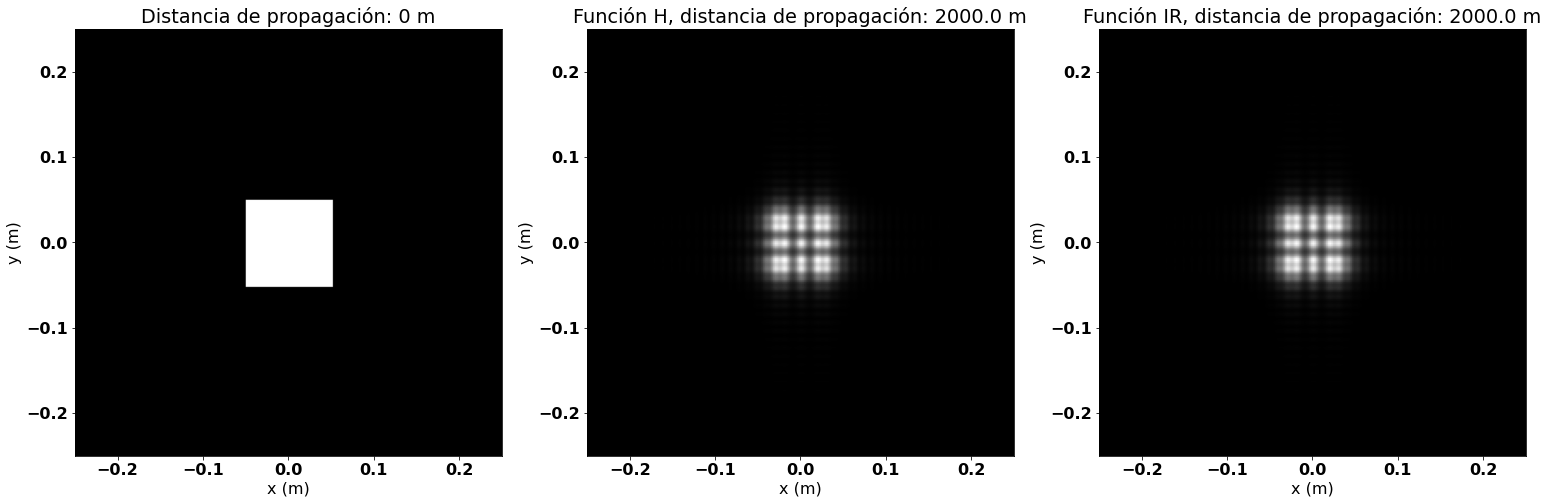

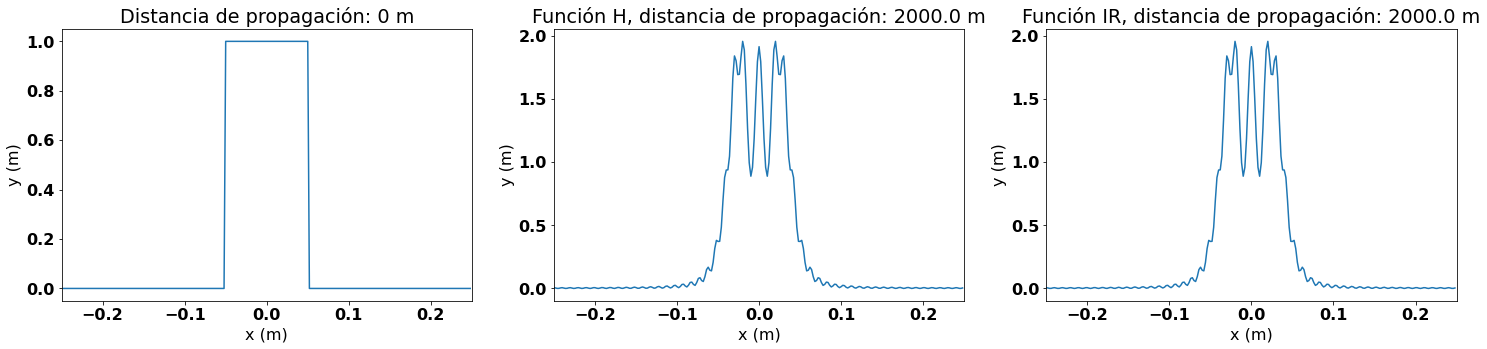

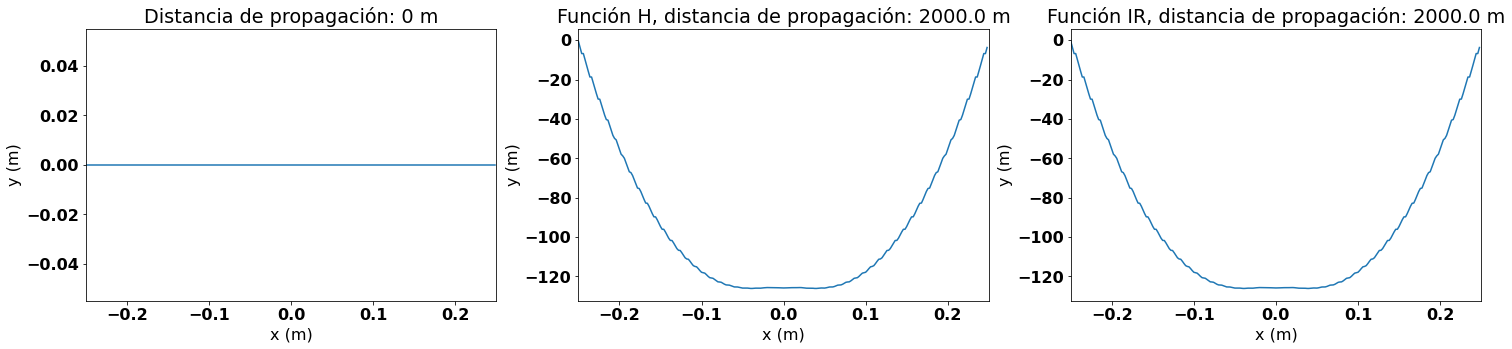

In [ ]:
L=0.5
N=250
dx=L/N
w=0.051
lam=0.5*1e-6
k=2*np.pi/lam
z=2000

x=np.arange(-L/2,L/2,dx)
y=x
X, Y = np.meshgrid(x, y);
u1 = rect2D(X/(2*w))*rect2D(Y/(2*w)) 
I1=np.abs(u1)**(2)
A1=np.angle(u1)

u2=propTF(u1,L,lam,z)
x2=x
y2=y
I2=np.abs(u2)**(2)
A2=np.angle(u2)

u3=propIR(u1,L,lam,z)
x3=x
y3=y
I3=np.abs(u3)**(2)
A3=np.angle(u3)

# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)


# imagen original
plt.subplot(1,3,1)
plt.imshow(I1, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(I2, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS


plt.subplot(1,3,3)
plt.imshow(I3, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Función IR, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)


plt.subplot(1,3,1)
plt.plot(x2,I1[round(N/2),:])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

plt.subplot(1,3,2)
plt.plot(x2,I2[round(N/2),:])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

plt.subplot(1,3,3)
plt.plot(x2,I3[round(N/2),:])
plt.title('Función IR, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen


# GRAFICACIÓN FASES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig2 = plt.figure(figsize=(25,5))
fig2.subplots_adjust(hspace=0.2)

plt.subplot(1,3,1)
plt.plot(x2,np.unwrap(A1[round(N/2),:]))
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

plt.subplot(1,3,2)
plt.plot(x2,np.unwrap(A2[round(N/2),:]))
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen


plt.subplot(1,3,3)
plt.plot(x2,np.unwrap(A3[round(N/2),:]))
plt.title('Función IR, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

print('El número de Fresnel es  : %.3f m' % (w**2/(lam*z)))
print('El muestreo usado es  : %.5f m' % dx)
print('El crítico es  : %.5f m' % ((lam*z)/L))

###***Ejemplo: pupila circular*** 

El número de Fresnel es  : 0.520 m
El muestreo usado es  : 0.00200 m
El crítico es  : 0.01000 m


<Figure size 1296x720 with 0 Axes>

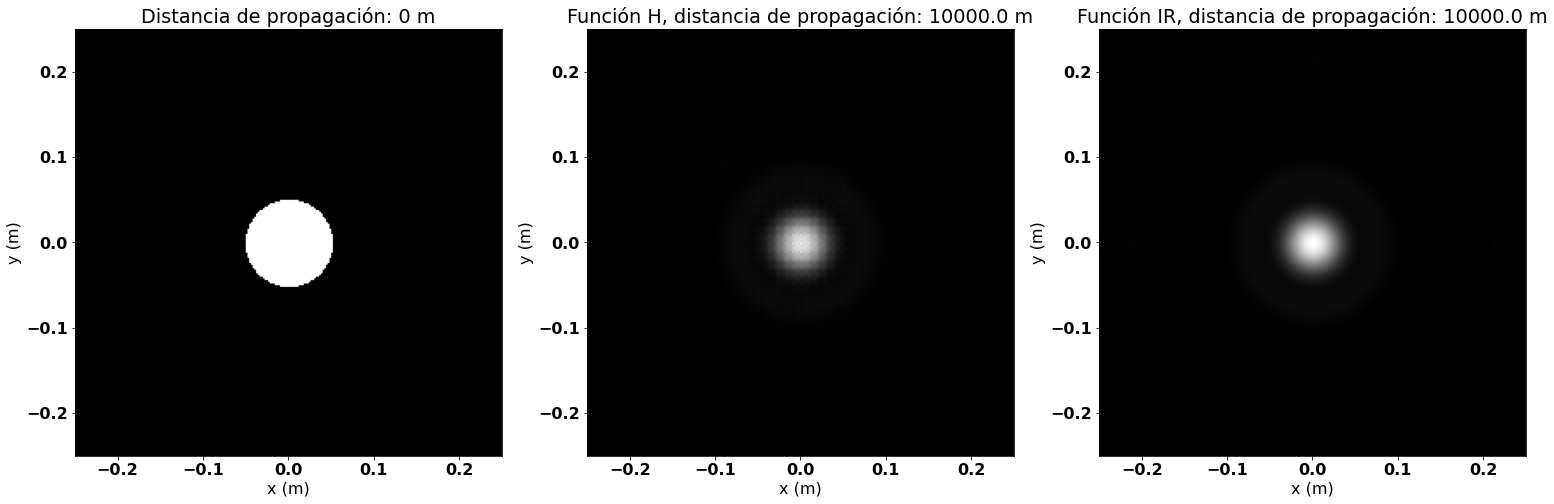

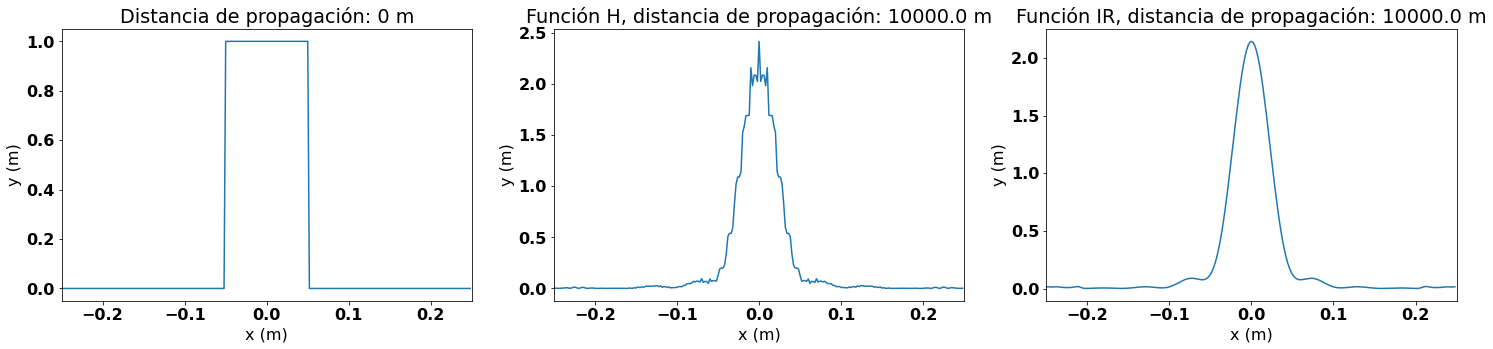

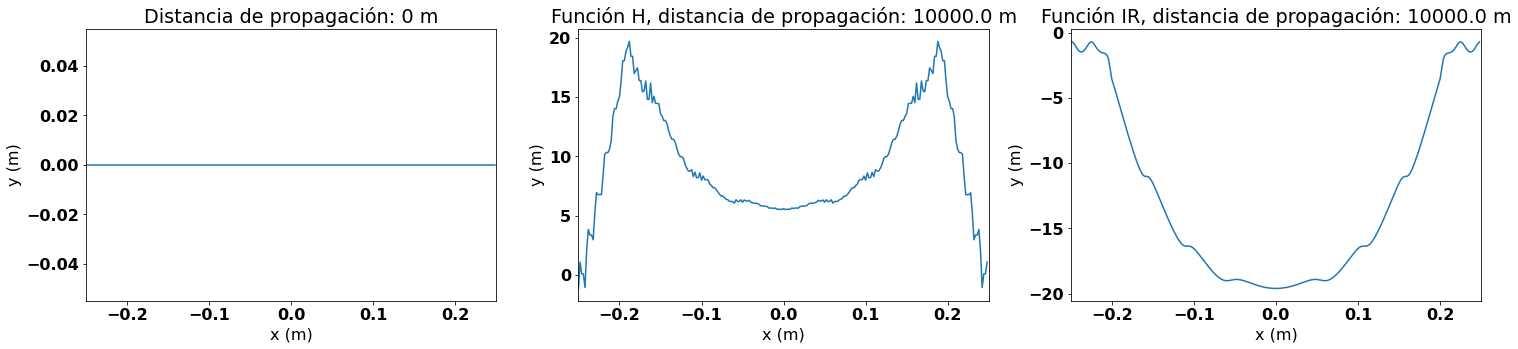

In [ ]:
L=0.5
N=250
dx=L/N
w=0.051
lam=0.5*1e-6
k=2*np.pi/lam
z=10000

x=np.arange(-L/2,L/2,dx)
y=x
X, Y = np.meshgrid(x, y);
u1 = circ(X,Y,w)
I1=np.abs(u1)**(2)
A1=np.angle(u1)

u2=propTF(u1,L,lam,z)
x2=x
y2=y
I2=np.abs(u2)**(2)
A2=np.angle(u2)

u3=propIR(u1,L,lam,z)
x3=x
y3=y
I3=np.abs(u3)**(2)
A3=np.angle(u3)

# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)


# imagen original
plt.subplot(1,3,1)
plt.imshow(I1, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,2)
plt.imshow(I2, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,3,3)
plt.imshow(I3, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Función IR, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)


plt.subplot(1,3,1)
plt.plot(x2,I1[round(N/2),:])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

plt.subplot(1,3,2)
plt.plot(x2,I2[round(N/2),:])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

plt.subplot(1,3,3)
plt.plot(x2,I3[round(N/2),:])
plt.title('Función IR, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen


# GRAFICACIÓN FASES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig2 = plt.figure(figsize=(25,5))
fig2.subplots_adjust(hspace=0.2)


plt.subplot(1,3,1)
plt.plot(x2,np.unwrap(A1[round(N/2),:]))
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen


plt.subplot(1,3,2)
plt.plot(x2,np.unwrap(A2[round(N/2),:]))
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen


plt.subplot(1,3,3)
plt.plot(x2,np.unwrap(A3[round(N/2),:]))
plt.title('Función IR, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

print('El número de Fresnel es  : %.3f m' % (w**2/(lam*z)))
print('El muestreo usado es  : %.5f m' % dx)
print('El crítico es  : %.5f m' % ((lam*z)/L))


##**Propagador de Fraunhofer**

In [ ]:
def propFF(u1,L1,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - FRAUNHOFER PATTERN
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  # L2 - Oobservation plane side length
  N=len(u1[0,:]) 
  dx1=L1/N
  k=2*np.pi/lam
  L2=lam*z/dx1
  dx2=lam*z/L1
  x2=np.arange(-L2/2,L2/2,dx2)  
  X2, Y2 = np.meshgrid(x2, x2);
  c=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X2**2+Y2**2))
  u2=c*np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(u1)))*dx1**2
  return u2, L2

###***Ejemplo: pupila cuadrada*** 

El número de Fresnel es  : 0.121 m
El muestreo usado es  : 0.00200 m
El crítico es  : 0.00200 m


<Figure size 1296x720 with 0 Axes>

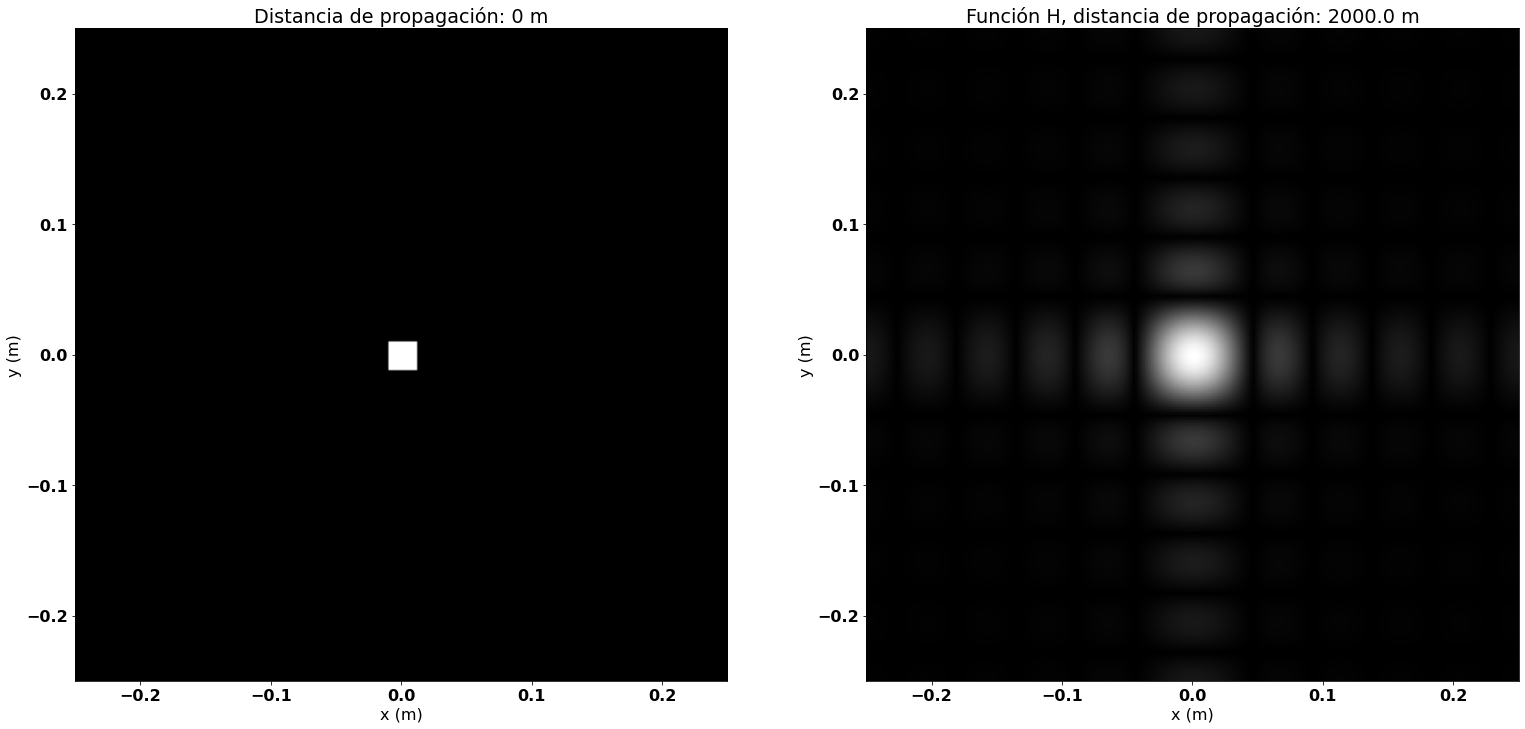

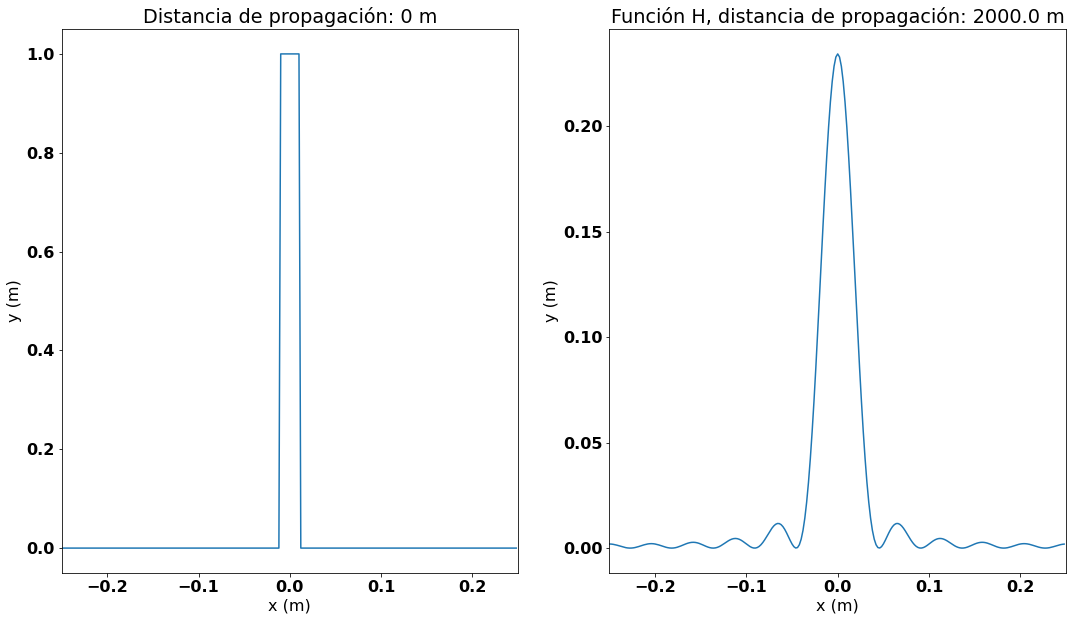

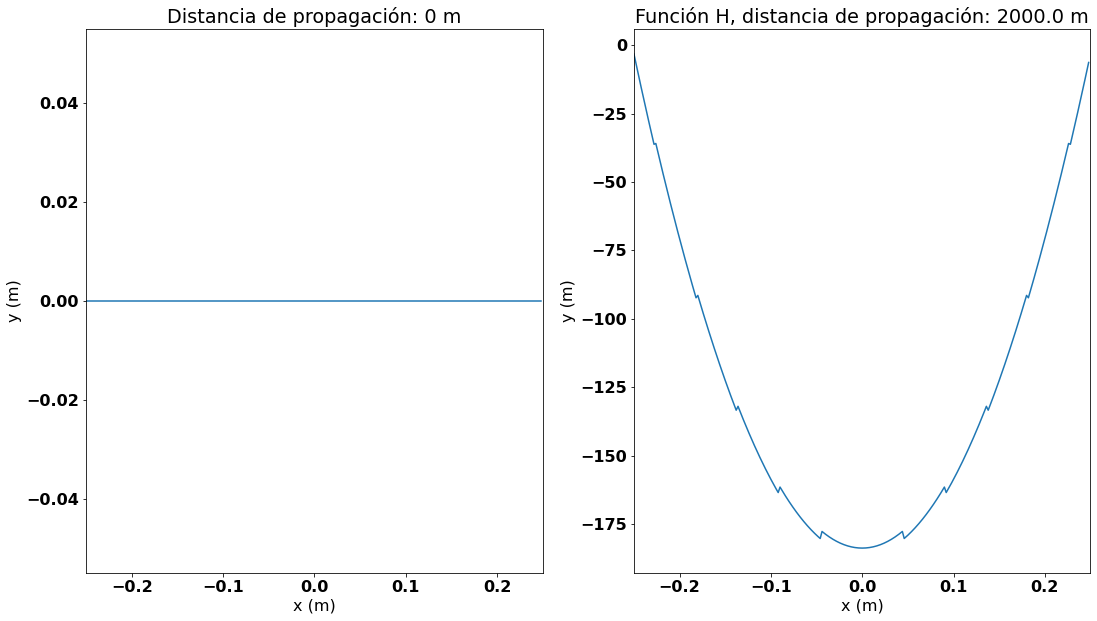

In [ ]:
L=0.5
N=250
dx=L/N
w=0.011
lam=0.5*1e-6
k=2*np.pi/lam
z=2000

x=np.arange(-L/2,L/2,dx)
y=x
X, Y = np.meshgrid(x, y);
u1 = rect2D(X/(2*w))*rect2D(Y/(2*w)) 
I1=np.abs(u1)**(2)
A1=np.angle(u1)

u2, L2=propFF(u1,L,lam,z)
dx2=L2/N
x2=np.arange(-L2/2,L2/2,dx2)
y2=x2
I2=np.abs(u2)**(2)
A2=np.angle(u2)


# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)


# imagen original
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,2,2)
plt.imshow(I2**(1/2), cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS


# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(18,10))
fig1.subplots_adjust(hspace=0.2)


plt.subplot(1,2,1)
plt.plot(x,I1[round(N/2),:])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
#m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen


plt.subplot(1,2,2)
plt.plot(x2,I2[round(N/2),:])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen


# GRAFICACIÓN FASES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig2 = plt.figure(figsize=(18,10))
fig2.subplots_adjust(hspace=0.2)

plt.subplot(1,2,1)
plt.plot(x,np.unwrap(A1[round(N/2),:]))
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

plt.subplot(1,2,2)
plt.plot(x2,np.unwrap(A2[round(N/2),:]))
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen

print('El número de Fresnel es  : %.3f m' % (w**2/(lam*z)))
print('El muestreo usado es  : %.5f m' % dx)
print('El crítico es  : %.5f m' % ((lam*z)/L))

###***Ejemplo: pupila circular*** 

El número de Fresnel es  : 0.040 m
El muestreo usado es  : 0.00200 m
El crítico es  : 0.00600 m


<Figure size 1296x720 with 0 Axes>

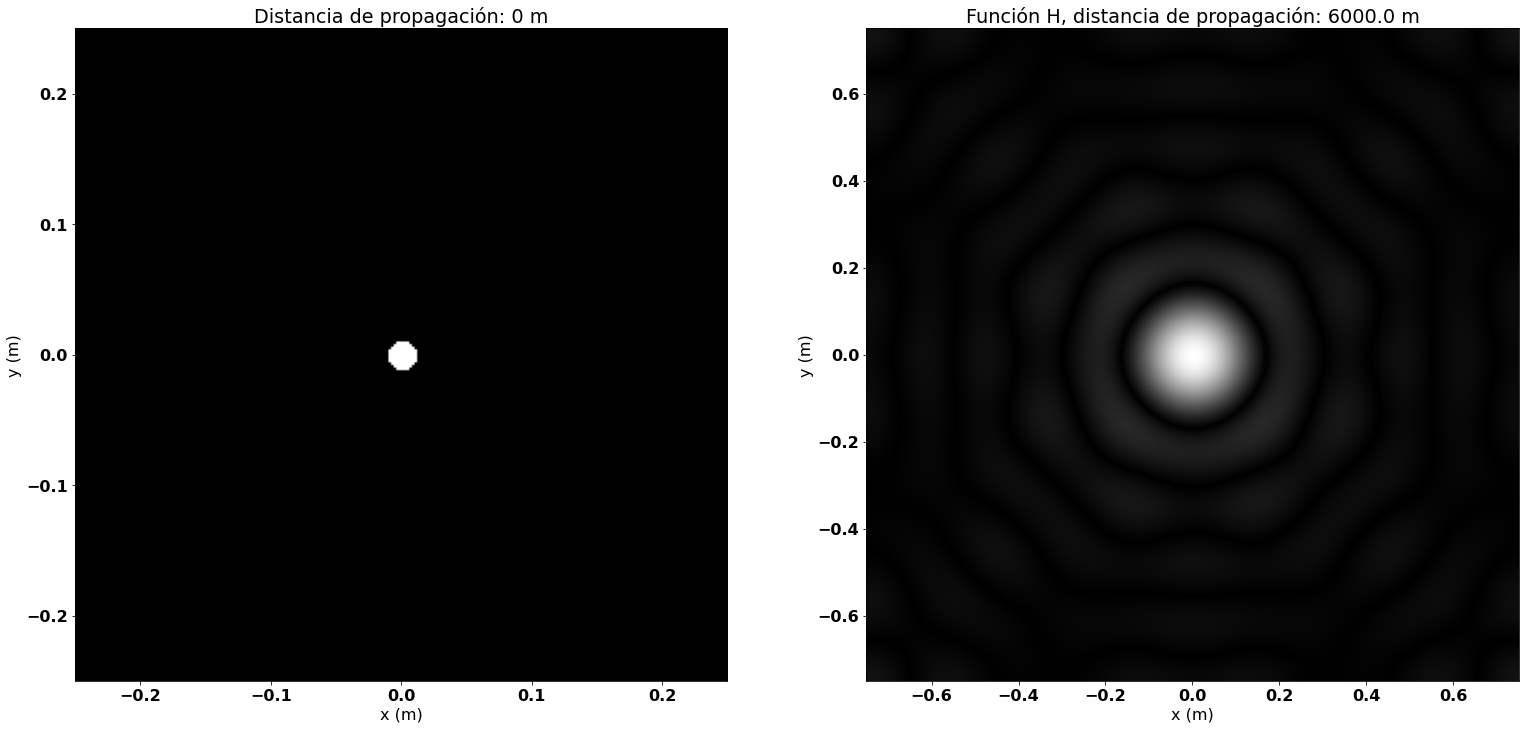

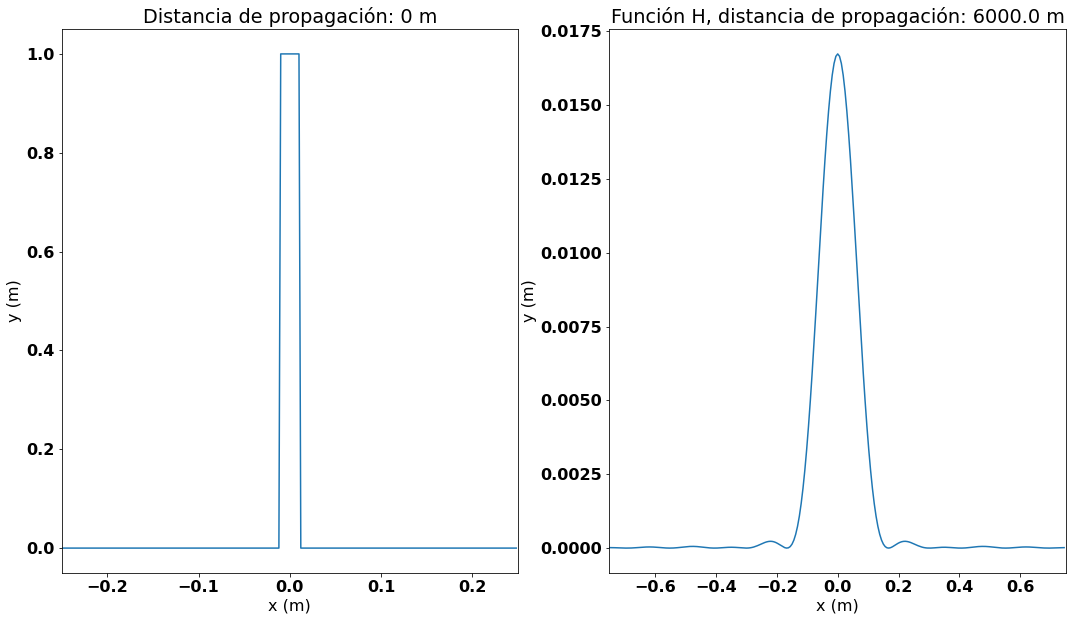

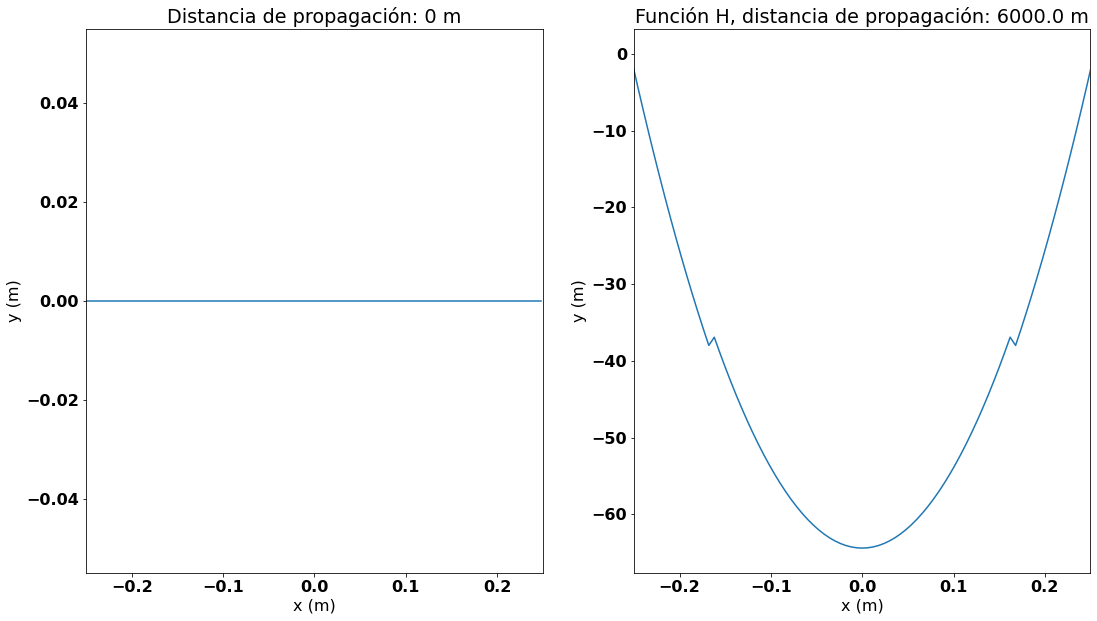

In [ ]:
L=0.5
N=250
dx=L/N
w=0.011
lam=0.5*1e-6
k=2*np.pi/lam
z=6000

x=np.arange(-L/2,L/2,dx)
y=x
X, Y = np.meshgrid(x, y);
u1 = circ(X,Y,w) 
I1=np.abs(u1)**(2)
A1=np.angle(u1)

u2, L2=propFF(u1,L,lam,z)
dx2=L2/N
x2=np.arange(-L2/2,L2/2,dx2)
y2=x2
I2=np.abs(u2)**(2)
A2=np.angle(u2)


# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(3, 3)


# imagen original
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray',extent=[-L/2,L/2,-L/2,L/2])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

plt.subplot(1,2,2)
plt.imshow(I2**(1/2), cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2])  ## Raíz para mejorar el contraste de la imagen
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS


# GRAFICACIÓN PERFILES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(18,10))
fig1.subplots_adjust(hspace=0.2)


plt.subplot(1,2,1)
plt.plot(x,I1[round(N/2),:])
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen


plt.subplot(1,2,2)
plt.plot(x2,I2[round(N/2),:])
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen


# GRAFICACIÓN FASES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig2 = plt.figure(figsize=(18,10))
fig2.subplots_adjust(hspace=0.2)

plt.subplot(1,2,1)
plt.plot(x,np.unwrap(A1[round(N/2),:]))
plt.title('Distancia de propagación: 0 m')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

plt.subplot(1,2,2)
plt.plot(x2,np.unwrap(A2[round(N/2),:]))
plt.title('Función H, distancia de propagación: %.1f m' % z)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L/2,m*0.1*L/2) ## zoom para ver mejor la imagen

print('El número de Fresnel es  : %.3f m' % (w**2/(lam*z)))
print('El muestreo usado es  : %.5f m' % dx)
print('El crítico es  : %.5f m' % ((lam*z)/L))